In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width: 98% !important }</style>'))

In [2]:
from utilities import *

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
loc = pd.read_csv('../Data/sequenceLoc.csv')
loc['time'] = pd.to_datetime(loc['time'])
loc.set_index('time', inplace=True)
loc = loc.groupby(pd.Grouper(freq='100ms')).mean()
loc

,X,Y
time,,
2020-01-03 03:20:17.800,0.913984,3.540312
2020-01-03 03:20:17.900,0.878266,3.491532
2020-01-03 03:20:18.000,NaN,NaN
2020-01-03 03:20:18.100,0.905576,3.362762
2020-01-03 03:20:18.200,0.932652,3.274408
...,...,...
2020-01-03 03:21:19.000,1.115414,3.595589
2020-01-03 03:21:19.100,1.130193,3.584988
2020-01-03 03:21:19.200,1.143236,3.564371


In [5]:
def transform(loc, inplace=False):
    if inplace:
        loc['X'] = 24.187023 + loc['X']
        loc['Y'] = 12.252072 - loc['Y']
    else:
        transformed = pd.DataFrame()
        transformed['X'] = 24.187023 + loc['X']
        transformed['Y'] = 12.252072 - loc['Y']
        return transformed

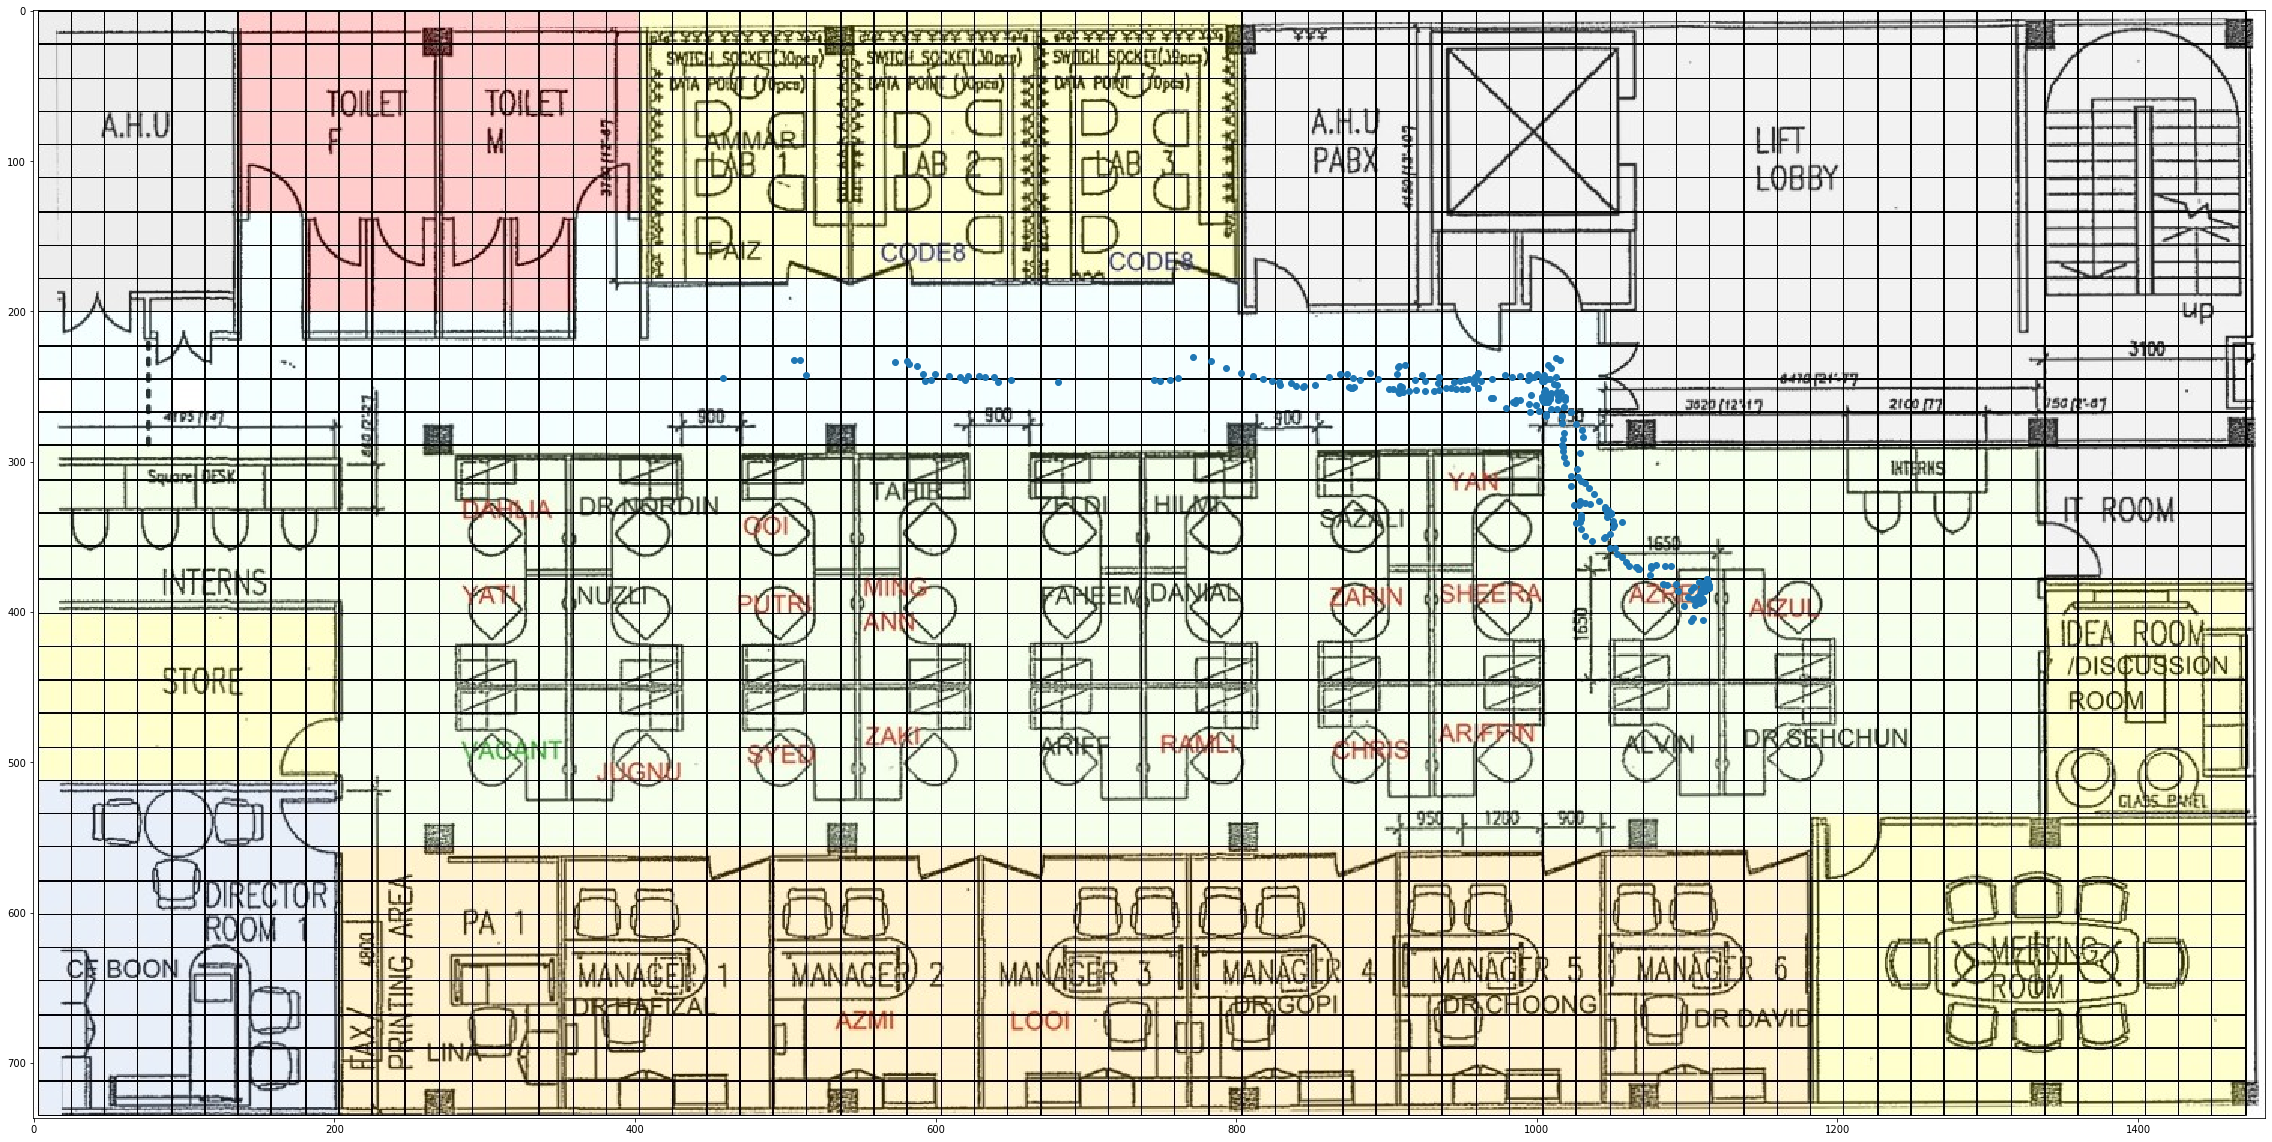

In [6]:
img =  mpimg.imread('../Map/main.png')

plt.figure(figsize=(40,40))
plt.imshow(img)

transform(loc, inplace=True)
plt.scatter(loc['X'] * 44, loc['Y'] * 44)